# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [33]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [34]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [35]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [36]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [37]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [38]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [39]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [40]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [41]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [42]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [43]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [44]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [45]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [46]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [47]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [02:13<00:00, 815.79it/s]


In [48]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [49]:
# similarly you can preprocess the titles also
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:05<00:00, 19693.38it/s]


## 1.5 Preparing data for models

In [50]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [51]:
#https://stackoverflow.com/a/51268652
project_data['teacher_prefix'].unique()

array(['Mrs.', 'Mr.', 'Ms.', 'Teacher', nan, 'Dr.'], dtype=object)

In [52]:
#https://stackoverflow.com/questions/15138973/how-to-get-the-number-of-the-most-frequent-value-in-a-column
project_data['teacher_prefix'].value_counts().idxmax()

'Mrs.'

In [53]:
#https://stackoverflow.com/a/40818627
project_data['teacher_prefix'].replace(np.nan,'Mrs.',inplace=True)

In [54]:
#https://stackoverflow.com/a/40818627
project_data['project_grade_category'].replace('Grades PreK-2','Gradeprektwo' ,inplace=True)
project_data['project_grade_category'].replace('Grades 6-8','Gradessixtoeight' ,inplace=True)
project_data['project_grade_category'].replace('Grades 3-5','Gradesthreetofive' ,inplace=True)
project_data['project_grade_category'].replace('Grades 9-12','Gradesninetotwelve' ,inplace=True)

In [55]:
#https://stackoverflow.com/a/51268652
project_data['project_grade_category'].unique()

array(['Gradeprektwo', 'Gradessixtoeight', 'Gradesthreetofive',
       'Gradesninetotwelve'], dtype=object)

###  >Concatenating school_state & project_grade_category to get new feature

In [56]:
project_data["project_grade_category"].unique()

array(['Gradeprektwo', 'Gradessixtoeight', 'Gradesthreetofive',
       'Gradesninetotwelve'], dtype=object)

In [57]:
project_data['school_state'].unique()

array(['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY',
       'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV',
       'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ',
       'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD',
       'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT'], dtype=object)

In [21]:
#data_2=project_data

In [58]:
project_data["grade_school_state"] =  project_data["project_grade_category"]+project_data["school_state"] 

In [59]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57           Gradeprektwo   
1           FL        2016-10-25 09:22:10       Gradessixtoeight   
2           AZ        2016-08-31 12:03:56       Gradessixtoeight   
3           KY        2016-10-06 21:16:17           Gradeprektwo   
4           TX        2016-07-11 01:10:09           Gradeprektwo   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay  grade_school_state  
0  My students are English learners that are work...      GradeprektwoIN  
1  Our students arrive to our school eager to lea...  GradessixtoeightFL  
2  \r\n\"True champions aren't always the ones th...  GradessixtoeightAZ  
3  I work at a unique school filled with both ESL...      GradeprektwoKY  
4  Our second grade classroom next year will be m...      GradeprektwoTX

In [60]:
project_data["grade_school_state"].unique().shape

(204,)

In [61]:
project_data["grade_school_state"].value_counts().argmax()

'GradeprektwoCA'

In [62]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [63]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

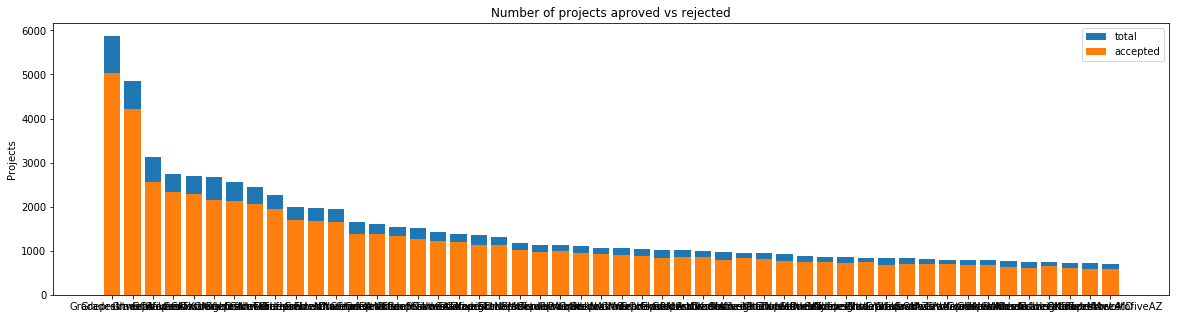

      grade_school_state  project_is_approved  total       Avg
4         GradeprektwoCA                 5023   5875  0.854979
157  GradesthreetofiveCA                 4219   4842  0.871334
43        GradeprektwoTX                 2555   3124  0.817862
34        GradeprektwoNY                 2339   2738  0.854273
106   GradessixtoeightCA                 2296   2692  0.852897
      grade_school_state  project_is_approved  total       Avg
111   GradessixtoeightFL                  597    748  0.798128
172  GradesthreetofiveMA                  651    738  0.882114
171  GradesthreetofiveLA                  602    731  0.823529
20        GradeprektwoMD                  595    716  0.831006
156  GradesthreetofiveAZ                  583    691  0.843705


In [64]:
univariate_barplots(project_data, 'grade_school_state', 'project_is_approved', top=50)

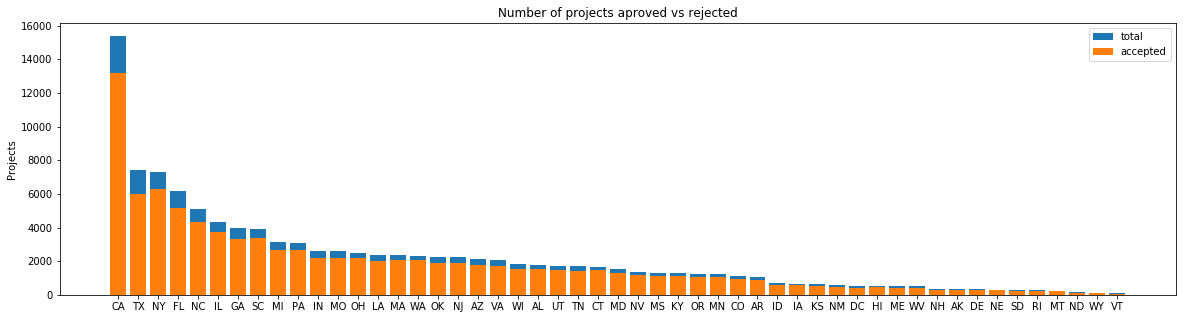

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [65]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

###  >Concatenating teacher_prefix & project_grade_category to get new feature

In [66]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [67]:
project_data["grade_teacher_prefix"] =  project_data["project_grade_category"]+project_data['teacher_prefix'] 

In [68]:
project_data["grade_teacher_prefix"].value_counts()

GradeprektwoMrs.             25940
GradesthreetofiveMrs.        20402
GradeprektwoMs.              16321
GradesthreetofiveMs.         12888
GradessixtoeightMrs.          7271
GradessixtoeightMs.           6032
GradesninetotwelveMs.         3714
GradesninetotwelveMrs.        3659
GradessixtoeightMr.           3216
GradesninetotwelveMr.         3201
GradesthreetofiveMr.          3092
GradeprektwoMr.               1139
GradeprektwoTeacher            824
GradesthreetofiveTeacher       753
GradessixtoeightTeacher        400
GradesninetotwelveTeacher      383
GradesninetotwelveDr.            6
GradessixtoeightDr.              4
GradesthreetofiveDr.             2
GradeprektwoDr.                  1
Name: grade_teacher_prefix, dtype: int64

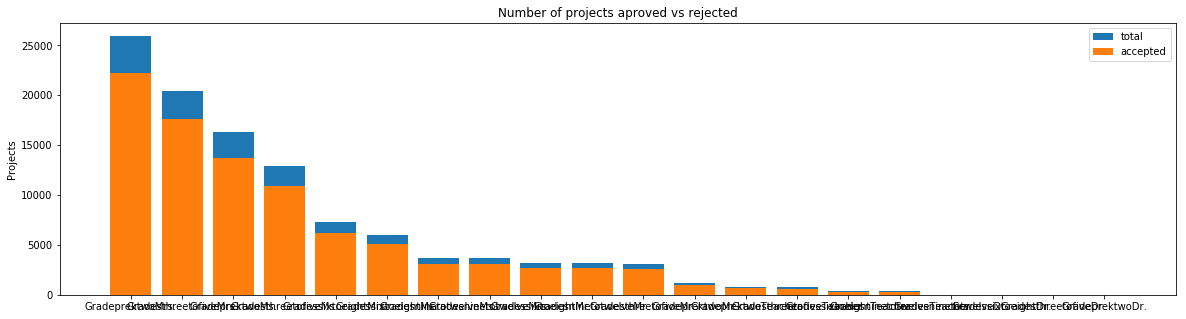

     grade_teacher_prefix  project_is_approved  total       Avg
2        GradeprektwoMrs.                22185  25940  0.855243
17  GradesthreetofiveMrs.                17581  20402  0.861729
3         GradeprektwoMs.                13726  16321  0.841002
18   GradesthreetofiveMs.                10921  12888  0.847377
12   GradessixtoeightMrs.                 6172   7271  0.848852
         grade_teacher_prefix  project_is_approved  total       Avg
9   GradesninetotwelveTeacher                  306    383  0.798956
5       GradesninetotwelveDr.                    3      6  0.500000
10        GradessixtoeightDr.                    3      4  0.750000
15       GradesthreetofiveDr.                    2      2  1.000000
0             GradeprektwoDr.                    1      1  1.000000


In [69]:
univariate_barplots(project_data, "grade_teacher_prefix", 'project_is_approved', False)

###  >Concatenating clean_categories & project_grade_category to get new feature

In [70]:
project_data["clean_categories"].unique().shape

(51,)

In [71]:
project_data["grade_clean_categories"] =  project_data["project_grade_category"]+project_data["clean_categories"] 

In [72]:
project_data["grade_clean_categories"].unique().shape

(197,)

In [138]:
#project_data["grade_clean_categories"].value_counts()[-50:]

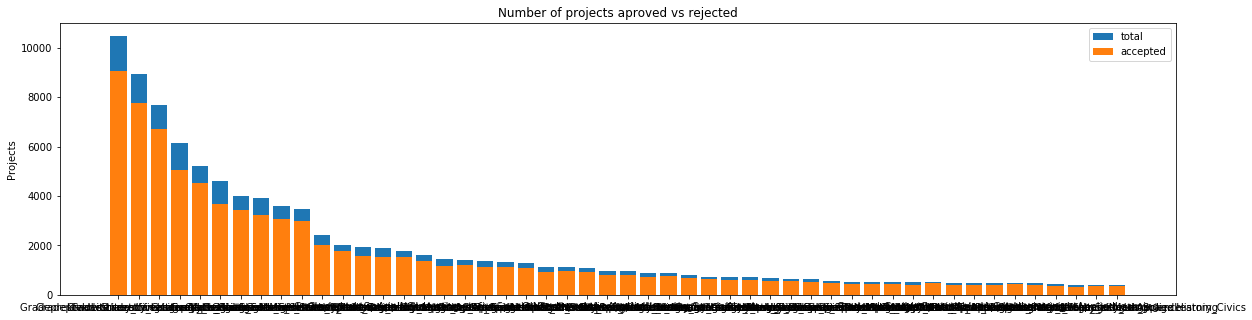

                              grade_clean_categories  project_is_approved  \
23                     GradeprektwoLiteracy_Language                 9044   
27        GradeprektwoLiteracy_Language Math_Science                 7773   
170               GradesthreetofiveLiteracy_Language                 6704   
178                    GradesthreetofiveMath_Science                 5053   
174  GradesthreetofiveLiteracy_Language Math_Science                 4519   

     total       Avg  
23   10472  0.863636  
27    8932  0.870242  
170   7684  0.872462  
178   6159  0.820425  
174   5198  0.869373  
                                grade_clean_categories  project_is_approved  \
37               GradeprektwoMath_Science SpecialNeeds                  383   
125     GradessixtoeightLiteracy_Language Math_Science                  361   
98                     GradessixtoeightAppliedLearning                  338   
179      GradesthreetofiveMath_Science AppliedLearning                  354   
173 

In [73]:
univariate_barplots(project_data, "grade_clean_categories", 'project_is_approved', top=50)

In [192]:
#import nltk
#nltk.download('vader_lexicon')

__ Computing Sentiment Scores__

In [74]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [75]:
ss

{'compound': 0.9975, 'neg': 0.01, 'neu': 0.745, 'pos': 0.245}

In [76]:
type(ss)

dict

In [77]:
ss['compound']

0.9975

In [78]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
a1=[]
a2=[]
a3=[]
a4=[]
for i in project_data['essay']:
    for_sentiment =i
    ss = sid.polarity_scores(for_sentiment)
    a1.append(ss['compound'])
    a2.append(ss['neg'])
    a3.append(ss['neu'])
    a4.append(ss['pos'])

In [198]:
#a4[2000:2450]

In [79]:
se=pd.Series(a2)
project_data['negative']=se.values 
se=pd.Series(a3)
project_data['neutral']=se.values 
se=pd.Series(a4)
project_data['positive']=se.values 

In [ ]:
#se=pd.Series(a1)
#project_data['compound']=se.values 

In [80]:
project_data['essay'][0]

'My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\\r\\n\\r\\nBy providing these dvd\'s and players, st

In [81]:
project_data['project_resource_summary'][56]

'My students need a coffee pot, coffee, cups + sleeves, and creamer to make this project possible!'

In [82]:
len(preprocessed_essays)
#preprocessed_essays

109248

In [83]:
len(preprocessed_project_titles)

109248

In [84]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [85]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [86]:
se=pd.Series(preprocessed_project_titles)
project_data['preprocessed_project_titles']=se.values  

In [87]:
se=pd.Series(preprocessed_essays)
project_data['preprocessed_essays']=se.values  

In [88]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57           Gradeprektwo   
1           FL        2016-10-25 09:22:10       Gradessixtoeight   
2           AZ        2016-08-31 12:03:56       Gradessixtoeight   
3           KY        2016-10-06 21:16:17           Gradeprektwo   
4           TX        2016-07-11 01:10:09           Gradeprektwo   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2  \
0  \"The limits of your language are the limits o...   
1  The projector we need for our school is very c...   
2  The students on the campus come to school know...   
3  My students live in high poverty conditions wi...   
4  For many students, math is a subject that does...   

                         ...                          grade_school_state  \
0                        ...                              GradeprektwoIN   
1                        ...                          GradessixtoeightFL   
2                        ...                          GradessixtoeightAZ   
3                        ...                              GradeprektwoKY   
4                        ...                              GradeprektwoTX   

  grade_teacher_prefix                        grade_clean_categories  \
0     GradeprektwoMrs.                 GradeprektwoLiteracy_Language   
1  GradessixtoeightMr.  GradessixtoeightHistory_Civics Health_Sports   
2  GradessixtoeightMs.                 GradessixtoeightHealth_Sports   
3     GradeprektwoMrs.    GradeprektwoLiteracy_Language Math_Science   
4     GradeprektwoMrs.                      GradeprektwoMath_Science   

   negative  neutral positive   price quantity  \
0     0.008    0.911    0.081  154.60       23   
1     0.037    0.851    0.112  299.00        1   
2     0.058    0.764    0.179  516.85       22   
3     0.052    0.733    0.214  232.90        4   
4     0.016    0.897    0.087   67.98        4   

                       preprocessed_project_titles  \
0        educational support english learners home   
1                 wanted projector hungry learners   
2  soccer equipment awesome middle school students   
3                           techie kindergarteners   
4                           interactive math tools   

                                 preprocessed_essays  
0  my students english learners working english s...  
1  our students arrive school eager learn they po...  
2  true champions not always ones win guts by mia...  
3  i work unique school filled esl english second...  
4  our second grade classroom next year made arou...  

[5 rows x 28 columns]

In [89]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'grade_school_state', 'grade_teacher_prefix', 'grade_clean_categories',
       'negative', 'neutral', 'positive', 'price', 'quantity',
       'preprocessed_project_titles', 'preprocessed_essays'],
      dtype='object')

In [90]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 28 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109248 non-null object
school_state                                    109248 non-null object
project_submitted_datetime                      109248 non-null object
project_grade_category                          109248 non-null object
project_title                                   109248 non-null object
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3                                 3758 non-null object
project_essay_4                                 3758 non-null object
project_resource_summary                  

###  -: number of words in the combine essays and number of words in the project_title

In [91]:
#https://stackoverflow.com/a/49984997
project_data['project_title_count']= project_data['project_title'].str.split().str.len()
project_data['essay_count']= project_data['essay'].str.split().str.len()

In [92]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57           Gradeprektwo   
1           FL        2016-10-25 09:22:10       Gradessixtoeight   
2           AZ        2016-08-31 12:03:56       Gradessixtoeight   
3           KY        2016-10-06 21:16:17           Gradeprektwo   
4           TX        2016-07-11 01:10:09           Gradeprektwo   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2     ...      \
0  \"The limits of your language are the limits o...     ...       
1  The projector we need for our school is very c...     ...       
2  The students on the campus come to school know...     ...       
3  My students live in high poverty conditions wi...     ...       
4  For many students, math is a subject that does...     ...       

                         grade_clean_categories negative neutral  positive  \
0                 GradeprektwoLiteracy_Language    0.008   0.911     0.081   
1  GradessixtoeightHistory_Civics Health_Sports    0.037   0.851     0.112   
2                 GradessixtoeightHealth_Sports    0.058   0.764     0.179   
3    GradeprektwoLiteracy_Language Math_Science    0.052   0.733     0.214   
4                      GradeprektwoMath_Science    0.016   0.897     0.087   

    price quantity                      preprocessed_project_titles  \
0  154.60       23        educational support english learners home   
1  299.00        1                 wanted projector hungry learners   
2  516.85       22  soccer equipment awesome middle school students   
3  232.90        4                           techie kindergarteners   
4   67.98        4                           interactive math tools   

                                 preprocessed_essays project_title_count  \
0  my students english learners working english s...                   7   
1  our students arrive school eager learn they po...                   5   
2  true champions not always ones win guts by mia...                   7   
3  i work unique school filled esl english second...                   2   
4  our second grade classroom next year made arou...                   3   

  essay_count  
0         272  
1         221  
2         361  
3         213  
4         234  

[5 rows x 30 columns]

In [93]:
project_data['project_title_count'].unique()

array([ 7,  5,  2,  3,  8,  6,  4, 10,  9, 12, 11,  1, 13], dtype=int64)

In [94]:
project_data['essay_count'].unique()

array([272, 221, 361, 213, 234, 291, 196, 301, 302, 235, 260, 473, 219,
       227, 209, 346, 402, 225, 215, 251, 253, 247, 186, 214, 243, 185,
       290, 200, 300, 422, 208, 242, 332, 312, 295, 353, 317, 236, 183,
       306, 358, 284, 190, 313, 419, 266, 360, 255, 391, 222, 262, 189,
       238, 325, 394, 275, 211, 356, 180, 197, 298, 293, 316, 212, 218,
       423, 226, 181, 198, 374, 201, 261, 188, 202, 194, 349, 278, 233,
       203, 338, 337, 229, 296, 191, 273, 246, 231, 289, 292, 237, 207,
       256, 223, 368, 184, 287, 263, 232, 285, 283, 182, 192, 484, 320,
       245, 276, 205, 384, 217, 342, 248, 415, 206, 347, 429, 454, 444,
       279, 179, 220, 376, 308, 250, 240, 210, 344, 425, 244, 321, 228,
       466, 249, 397, 399, 239, 443, 282, 193, 309, 259, 280, 269, 216,
       297, 187, 274, 364, 257, 366, 311, 452, 405, 329, 357, 268, 383,
       328, 354, 303, 378, 195, 178, 270, 307, 334, 299, 327, 199, 335,
       277, 456, 254, 230, 258, 359, 204, 392, 324, 322, 432, 22

###  -: number of words in project_resource_summary

In [95]:
#https://stackoverflow.com/a/49984997
project_data['project_resource_summ_count']= project_data['project_resource_summary'].str.split().str.len()

In [96]:
project_data['project_resource_summ_count'].unique()

array([ 13,  11,  19,  20,  26,  36,  14,  32,  17,  21,  28,  23,  27,
        15,  22,  18,  16,  24,  12,  33,  35,  29,  25,  34,  31,  30,
         9,   8,   6,  10,   7,   5,   4, 137,  67,  37], dtype=int64)

###  -: presence of numbers in project_resource_summary

In [97]:
a5=project_data['project_resource_summary'].values
a6=[]
a5.shape

(109248,)

In [98]:
#https://stackoverflow.com/a/4289557
for n in a5[:]:
    str =n
    ss=[int(s) for s in str.split() if s.isdigit()]
    if len(ss)!=0:
        a6.append(1)
    else:
        a6.append(0)

In [99]:
#https://stackoverflow.com/a/41509977
se=pd.Series(a6)
project_data['digits in summary']=se.values    #concatenating column to Project_data

In [683]:
#project_data['digits in summary'][0:15]

In [100]:
project_data['digits in summary'].shape

(109248,)

In [101]:
type(project_data['digits in summary'])

pandas.core.series.Series

In [102]:
project_data['price'].unique()

array([154.6 , 299.  , 516.85, ..., 267.5 , 592.16, 846.32])

In [103]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 32 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109248 non-null object
school_state                                    109248 non-null object
project_submitted_datetime                      109248 non-null object
project_grade_category                          109248 non-null object
project_title                                   109248 non-null object
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3                                 3758 non-null object
project_essay_4                                 3758 non-null object
project_resource_summary                  

In [104]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57           Gradeprektwo   
1           FL        2016-10-25 09:22:10       Gradessixtoeight   
2           AZ        2016-08-31 12:03:56       Gradessixtoeight   
3           KY        2016-10-06 21:16:17           Gradeprektwo   
4           TX        2016-07-11 01:10:09           Gradeprektwo   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2        ...         \
0  \"The limits of your language are the limits o...        ...          
1  The projector we need for our school is very c...        ...          
2  The students on the campus come to school know...        ...          
3  My students live in high poverty conditions wi...        ...          
4  For many students, math is a subject that does...        ...          

  neutral positive   price  quantity  \
0   0.911    0.081  154.60        23   
1   0.851    0.112  299.00         1   
2   0.764    0.179  516.85        22   
3   0.733    0.214  232.90         4   
4   0.897    0.087   67.98         4   

                       preprocessed_project_titles  \
0        educational support english learners home   
1                 wanted projector hungry learners   
2  soccer equipment awesome middle school students   
3                           techie kindergarteners   
4                           interactive math tools   

                                 preprocessed_essays project_title_count  \
0  my students english learners working english s...                   7   
1  our students arrive school eager learn they po...                   5   
2  true champions not always ones win guts by mia...                   7   
3  i work unique school filled esl english second...                   2   
4  our second grade classroom next year made arou...                   3   

  essay_count project_resource_summ_count digits in summary  
0         272                          13                 0  
1         221                          11                 0  
2         361                          19                 0  
3         213                          20                 0  
4         234                          26                 0  

[5 rows x 32 columns]

In [105]:
project_data.shape

(109248, 32)

In [106]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'grade_school_state', 'grade_teacher_prefix', 'grade_clean_categories',
       'negative', 'neutral', 'positive', 'price', 'quantity',
       'preprocessed_project_titles', 'preprocessed_essays',
       'project_title_count', 'essay_count', 'project_resource_summ_count',
       'digits in summary'],
      dtype='object')

In [107]:
#https://stackoverflow.com/a/49146587
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 32 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109248 non-null object
school_state                                    109248 non-null object
project_submitted_datetime                      109248 non-null object
project_grade_category                          109248 non-null object
project_title                                   109248 non-null object
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3                                 3758 non-null object
project_essay_4                                 3758 non-null object
project_resource_summary                  

In [108]:
project_data.shape

(109248, 32)

## -: Using all datapoints

In [109]:
project_data_2=project_data.iloc[0:109248,:]

In [110]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=5g7LPoYC0ozW&line=3&uniqifier=1
y = project_data_2['project_is_approved'].values
project_data_2.drop(['project_is_approved'], axis=1, inplace=True)
project_data_2.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57           Gradeprektwo   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2        ...         \
0  \"The limits of your language are the limits o...        ...          

  neutral positive  price  quantity  \
0   0.911    0.081  154.6        23   

                 preprocessed_project_titles  \
0  educational support english learners home   

                                 preprocessed_essays project_title_count  \
0  my students english learners working english s...                   7   

  essay_count project_resource_summ_count digits in summary  
0         272                          13                 0  

[1 rows x 31 columns]

In [111]:
X = project_data_2

In [112]:
project_data_2.shape

(109248, 31)

In [123]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=3QtobH230ozc&line=4&uniqifier=1
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
#categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
#print(vectorizer.get_feature_names())
#print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [124]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=7pswYg_I0ozh&line=20&uniqifier=1
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()),lowercase=False,binary=True,ngram_range=(1,4))
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_one_hot.shape, y_train.shape)
print(X_cv_categories_one_hot.shape, y_cv.shape)
print(X_test_categories_one_hot.shape, y_test.shape)
print("="*100)


(51236, 31) (51236,)
(25237, 31) (25237,)
(32775, 31) (32775,)
After vectorizations
(51236, 9) (51236,)
(25237, 9) (25237,)
(32775, 9) (32775,)


In [125]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=7pswYg_I0ozh&line=20&uniqifier=1
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()),lowercase=False,binary=True)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_categories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_categories_one_hot.shape, y_train.shape)
print(X_cv_sub_categories_one_hot.shape, y_cv.shape)
print(X_test_sub_categories_one_hot.shape, y_test.shape)
print("="*100)

(51236, 31) (51236,)
(25237, 31) (25237,)
(32775, 31) (32775,)
After vectorizations
(51236, 30) (51236,)
(25237, 30) (25237,)
(32775, 30) (32775,)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [126]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=5vJKfrXS0ozn&line=10&uniqifier=1
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(51236, 51) (51236,)
(25237, 51) (25237,)
(32775, 51) (32775,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [127]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=30S6WA_G0ozr&line=9&uniqifier=1
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(51236, 5) (51236,)
(25237, 5) (25237,)
(32775, 5) (32775,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [128]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=fnKZWhBF0ozv&line=10&uniqifier=1
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(51236, 4) (51236,)
(25237, 4) (25237,)
(32775, 4) (32775,)
['gradeprektwo', 'gradesninetotwelve', 'gradessixtoeight', 'gradesthreetofive']


### >Vectorizing categorical features :'grade_school_state' & 'grade_teacher_prefix' & 'grade_clean_categories'

In [129]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=fnKZWhBF0ozv&line=10&uniqifier=1
vectorizer = CountVectorizer()
vectorizer.fit(X_train['grade_school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_school_state = vectorizer.transform(X_train['grade_school_state'].values)
X_cv_grade_school_state = vectorizer.transform(X_cv['grade_school_state'].values)
X_test_grade_school_state = vectorizer.transform(X_test['grade_school_state'].values)

print("After vectorizations")
print(X_train_grade_school_state.shape, y_train.shape)
print(X_cv_grade_school_state.shape, y_cv.shape)
print(X_test_grade_school_state.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(51236, 204) (51236,)
(25237, 204) (25237,)
(32775, 204) (32775,)


In [130]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=fnKZWhBF0ozv&line=10&uniqifier=1
vectorizer = CountVectorizer()
vectorizer.fit(X_train['grade_teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_teacher_prefix = vectorizer.transform(X_train['grade_teacher_prefix'].values)
X_cv_grade_teacher_prefix = vectorizer.transform(X_cv['grade_teacher_prefix'].values)
X_test_grade_teacher_prefix= vectorizer.transform(X_test['grade_teacher_prefix'].values)

print("After vectorizations")
print(X_train_grade_teacher_prefix.shape, y_train.shape)
print(X_cv_grade_teacher_prefix.shape, y_cv.shape)
print(X_test_grade_teacher_prefix.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(51236, 20) (51236,)
(25237, 20) (25237,)
(32775, 20) (32775,)


In [131]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=fnKZWhBF0ozv&line=10&uniqifier=1
vectorizer = CountVectorizer()
vectorizer.fit(X_train['grade_clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_clean_categories = vectorizer.transform(X_train['grade_clean_categories'].values)
X_cv_grade_clean_categories = vectorizer.transform(X_cv['grade_clean_categories'].values)
X_test_grade_clean_categories = vectorizer.transform(X_test['grade_clean_categories'].values)

print("After vectorizations")
print(X_train_grade_clean_categories.shape, y_train.shape)
print(X_cv_grade_clean_categories.shape, y_cv.shape)
print(X_test_grade_clean_categories.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(51236, 41) (51236,)
(25237, 41) (25237,)
(32775, 41) (32775,)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [95]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#vectorizer = CountVectorizer(min_df=10)
#text_bow = vectorizer.fit_transform(preprocessed_essays)
#print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [139]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)    
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(51236, 31) (51236,)
(25237, 31) (25237,)
(32775, 31) (32775,)
After vectorizations
(51236, 5000) (51236,)
(25237, 5000) (25237,)
(32775, 5000) (32775,)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [140]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()       
vectorizer.fit(X_train['preprocessed_project_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_titles_bow = vectorizer.transform(X_train['preprocessed_project_titles'].values)
X_cv_project_titles_bow = vectorizer.transform(X_cv['preprocessed_project_titles'].values)
X_test_project_titles_bow = vectorizer.transform(X_test['preprocessed_project_titles'].values)

print("After vectorizations")
print(X_train_project_titles_bow.shape, y_train.shape)
print(X_cv_project_titles_bow.shape, y_cv.shape)
print(X_test_project_titles_bow.shape, y_test.shape)
print("="*100)


(51236, 31) (51236,)
(25237, 31) (25237,)
(32775, 31) (32775,)
After vectorizations
(51236, 12008) (51236,)
(25237, 12008) (25237,)
(32775, 12008) (32775,)


#### 1.5.2.2 TFIDF vectorizer

In [100]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(min_df=10)
#text_tfidf = vectorizer.fit_transform(preprocessed_essays)
#print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [141]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(2,2), max_features=5000)    
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(51236, 31) (51236,)
(25237, 31) (25237,)
(32775, 31) (32775,)
After vectorizations
(51236, 5000) (51236,)
(25237, 5000) (25237,)
(32775, 5000) (32775,)


In [142]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)



from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()       
vectorizer.fit(X_train['preprocessed_project_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_titles_tfidf = vectorizer.transform(X_train['preprocessed_project_titles'].values)
X_cv_project_titles_tfidf = vectorizer.transform(X_cv['preprocessed_project_titles'].values)
X_test_project_titles_tfidf = vectorizer.transform(X_test['preprocessed_project_titles'].values)

print("After vectorizations")
print(X_train_project_titles_tfidf.shape, y_train.shape)
print(X_cv_project_titles_tfidf.shape, y_cv.shape)
print(X_test_project_titles_tfidf.shape, y_test.shape)
print("="*100)

(51236, 31) (51236,)
(25237, 31) (25237,)
(32775, 31) (32775,)
After vectorizations
(51236, 12008) (51236,)
(25237, 12008) (25237,)
(32775, 12008) (32775,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [143]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [144]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_train.append(vector)

print(len(avg_w2v_vectors_X_train))
print(len(avg_w2v_vectors_X_train[0]))

100%|██████████| 51236/51236 [00:33<00:00, 1535.44it/s]


51236
300


In [145]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_cv.append(vector)

print(len(avg_w2v_vectors_X_cv))
print(len(avg_w2v_vectors_X_cv[0]))

100%|██████████| 25237/25237 [00:16<00:00, 1513.20it/s]


25237
300


In [146]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_test.append(vector)

print(len(avg_w2v_vectors_X_test))
print(len(avg_w2v_vectors_X_test[0]))

100%|██████████| 32775/32775 [00:21<00:00, 1548.13it/s]


32775
300


##   >for project titles

In [147]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_train_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_train_titles.append(vector)

print(len(avg_w2v_vectors_X_train_titles))
print(len(avg_w2v_vectors_X_train_titles[0]))

100%|██████████| 51236/51236 [00:01<00:00, 36398.42it/s]


51236
300


In [148]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_cv_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_cv_titles.append(vector)

print(len(avg_w2v_vectors_X_cv_titles))
print(len(avg_w2v_vectors_X_cv_titles[0]))

100%|██████████| 25237/25237 [00:00<00:00, 31089.35it/s]


25237
300


In [149]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_X_test_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_X_test_titles.append(vector)

print(len(avg_w2v_vectors_X_test_titles))
print(len(avg_w2v_vectors_X_test_titles[0]))

100%|██████████| 32775/32775 [00:01<00:00, 32114.26it/s]


32775
300


## 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [150]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [151]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train.append(vector)

print(len(tfidf_w2v_vectors_X_train))
print(len(tfidf_w2v_vectors_X_train[0]))

100%|██████████| 51236/51236 [03:55<00:00, 217.43it/s]


51236
300


In [152]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_cv.append(vector)

print(len(tfidf_w2v_vectors_X_cv))
print(len(tfidf_w2v_vectors_X_cv[0]))

100%|██████████| 25237/25237 [01:54<00:00, 219.91it/s]


25237
300


In [153]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test.append(vector)

print(len(tfidf_w2v_vectors_X_test))
print(len(tfidf_w2v_vectors_X_test[0]))

100%|██████████| 32775/32775 [02:32<00:00, 214.38it/s]


32775
300


In [0]:
# Similarly you can vectorize for title also

##   >for project titles

In [154]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [155]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_titles.append(vector)

print(len(tfidf_w2v_vectors_X_train_titles))
print(len(tfidf_w2v_vectors_X_train_titles[0]))

100%|██████████| 51236/51236 [00:03<00:00, 16237.94it/s]


51236
300


In [156]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_cv_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_cv_titles.append(vector)

print(len(tfidf_w2v_vectors_X_cv_titles))
print(len(tfidf_w2v_vectors_X_cv_titles[0]))

100%|██████████| 25237/25237 [00:01<00:00, 14832.57it/s]


25237
300


In [157]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_titles.append(vector)

print(len(tfidf_w2v_vectors_X_test_titles))
print(len(tfidf_w2v_vectors_X_test_titles[0]))

100%|██████████| 32775/32775 [00:02<00:00, 13770.60it/s]


32775
300


### 1.5.3 Vectorizing Numerical features

In [0]:
#price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

#price_scalar = StandardScaler()
#price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
#price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
#price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

In [158]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=kp2ibSW10oz1&line=13&uniqifier=1
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


## >>for teacher_number_of_previously_posted_projects

In [159]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=kp2ibSW10oz1&line=13&uniqifier=1from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_norm.shape, y_train.shape)
print(X_cv_teacher_norm.shape, y_cv.shape)
print(X_test_teacher_norm.shape, y_test.shape)
print("="*100)
    

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


## >>for number of words in the combine essays |

In [160]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=kp2ibSW10oz1&line=13&uniqifier=1from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['essay_count'].values.reshape(-1,1))

X_train_essay_count_norm = normalizer.transform(X_train['essay_count'].values.reshape(-1,1))
X_cv_essay_count_norm = normalizer.transform(X_cv['essay_count'].values.reshape(-1,1))
X_test_essay_count_norm = normalizer.transform(X_test['essay_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_count_norm.shape, y_train.shape)
print(X_cv_essay_count_norm.shape, y_cv.shape)
print(X_test_essay_count_norm.shape, y_test.shape)
print("="*100)
    

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


## >>for number of words in the title

In [161]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=kp2ibSW10oz1&line=13&uniqifier=1from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['project_title_count'].values.reshape(-1,1))

X_train_title_count_norm = normalizer.transform(X_train['project_title_count'].values.reshape(-1,1))
X_cv_title_count_norm = normalizer.transform(X_cv['project_title_count'].values.reshape(-1,1))
X_test_title_count_norm = normalizer.transform(X_test['project_title_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_title_count_norm.shape, y_train.shape)
print(X_cv_title_count_norm.shape, y_cv.shape)
print(X_test_title_count_norm.shape, y_test.shape)
print("="*100)
    

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


## >>for number of words in project_resource_summary

In [162]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=kp2ibSW10oz1&line=13&uniqifier=1from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['project_resource_summ_count'].values.reshape(-1,1))

X_train_summ_count_norm = normalizer.transform(X_train['project_resource_summ_count'].values.reshape(-1,1))
X_cv_summ_count_norm = normalizer.transform(X_cv['project_resource_summ_count'].values.reshape(-1,1))
X_test_summ_count_norm = normalizer.transform(X_test['project_resource_summ_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_summ_count_norm.shape, y_train.shape)
print(X_cv_summ_count_norm.shape, y_cv.shape)
print(X_test_summ_count_norm.shape, y_test.shape)
print("="*100)
    

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


## >>for Quantity

In [163]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=kp2ibSW10oz1&line=13&uniqifier=1from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)
    

After vectorizations
(51236, 1) (51236,)
(25237, 1) (25237,)
(32775, 1) (32775,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [164]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=UJ_XtSfe0oz5&line=9&uniqifier=1
from scipy.sparse import hstack
X_tr = hstack((X_train_teacher_norm,X_train_price_norm,X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe)).tocsr()
print(X_tr.shape, y_train.shape)

(51236, 101) (51236,)


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Logistic Regression </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
     #>>completed above

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
     #>>completed above

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
     #>>completed above

<h2>2.4 Appling Logistic Regression on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Logistic Regression on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
    

In [ ]:
#project_data['digits in summary']

In [167]:
X_train_digits_summary=np.array(X_train['digits in summary'])
X_cv_digits_summary=np.array(X_cv['digits in summary'])
X_test_digits_summary=np.array(X_test['digits in summary'])

In [168]:
X_train_digits_summary=X_train_digits_summary.reshape(-1,1)
X_cv_digits_summary=X_cv_digits_summary.reshape(-1,1)
X_test_digits_summary=X_test_digits_summary.reshape(-1,1)

In [169]:
print(X_train_digits_summary.shape)
print(X_cv_digits_summary.shape)
print(X_test_digits_summary.shape)

(51236, 1)
(25237, 1)
(32775, 1)


## >SET1:

In [171]:
# Please write all the code with proper documentation
##https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=UJ_XtSfe0oz5&line=9&uniqifier=1
from scipy.sparse import hstack
X_tr = hstack((X_train_teacher_norm,X_train_price_norm,X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_project_titles_bow,X_train_essay_bow,X_train_grade_school_state,X_train_grade_teacher_prefix,X_train_grade_clean_categories,X_train_summ_count_norm,X_train_digits_summary)).tocsr()
X_cr = hstack((X_cv_teacher_norm,X_cv_price_norm,X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_project_titles_bow,X_cv_essay_bow,X_cv_grade_school_state,X_cv_grade_teacher_prefix,X_cv_grade_clean_categories,X_cv_summ_count_norm,X_cv_digits_summary)).tocsr()
X_te = hstack((X_test_teacher_norm,X_test_price_norm,X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_project_titles_bow,X_test_essay_bow,X_test_grade_school_state,X_test_grade_teacher_prefix,X_test_grade_clean_categories,X_test_summ_count_norm,X_test_digits_summary)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)    

Final Data matrix
(51236, 17376) (51236,)
(25237, 17376) (25237,)
(32775, 17376) (32775,)


In [179]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=1PvKeJaW0o0E&line=12&uniqifier=1
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

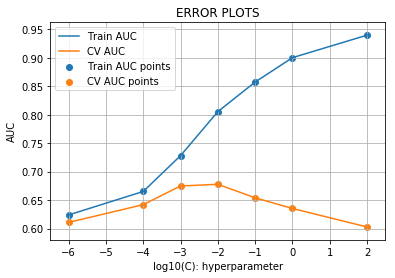

In [187]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=s2c4oHNn0o0G&line=3&uniqifier=1
import matplotlib.pyplot as plt
import math
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a=[]
K = [0.000001,0.0001,0.001,0.01,0.1,1,100]
for i in K:
    neigh = LogisticRegression(random_state=0,C=i,class_weight='balanced')
    neigh.fit(X_tr, y_train)
    a.append(math.log10(i))

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    
plt.plot(a, train_auc, label='Train AUC')
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

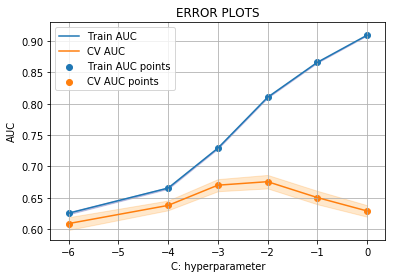

In [176]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import LogisticRegression

neigh = LogisticRegression(class_weight='balanced')
parameters = {'C': [0.000001,0.0001,0.001,0.01,0.1,1]}
clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

a=[]
for i in parameters['C']:
    a.append(math.log10(i))

    

plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(a, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [219]:
best_C = 0.01

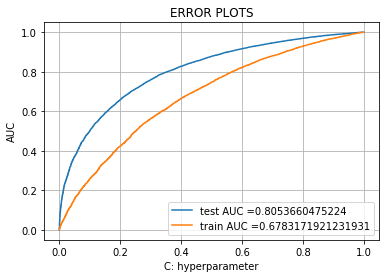

In [220]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=S1OoXn2V0o0T&line=9&uniqifier=1
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(random_state=0,C=best_C,class_weight='balanced')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="test AUC =" + (auc(train_fpr, train_tpr)).__str__())
plt.plot(test_fpr, test_tpr, label="train AUC =" + (auc(test_fpr, test_tpr)).__str__())


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [216]:
#str

'My students need opportunities to work with technology in order to become marketable 21st century citizens. These chromebooks will give them the chance to do just that.'

In [221]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=NNblWZd50o0W&line=10&uniqifier=1
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [222]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
from sklearn.metrics import confusion_matrix
print("-"*50)
print("Train confusion matrix")
a1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(a1)

--------------------------------------------------
Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.4
[[ 3879  3879]
 [ 5307 38171]]


Text(0.5,15,'Predicted label')

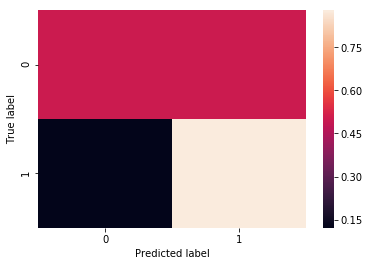

In [223]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a1
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [224]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
print("-"*50)
print("Test confusion matrix")
a2=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(a2)

--------------------------------------------------
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.472
[[ 2559  2404]
 [ 7441 20371]]


Text(0.5,15,'Predicted label')

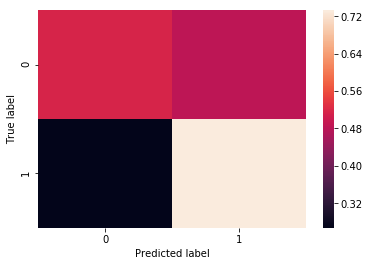

In [225]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a2
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## >SET 2:

In [226]:
# Please write all the code with proper documentation
##https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=UJ_XtSfe0oz5&line=9&uniqifier=1
from scipy.sparse import hstack
X_tr = hstack((X_train_teacher_norm,X_train_price_norm,X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_project_titles_tfidf,X_train_essay_tfidf,X_train_grade_school_state,X_train_grade_teacher_prefix,X_train_grade_clean_categories,X_train_summ_count_norm,X_train_digits_summary)).tocsr()
X_cr = hstack((X_cv_teacher_norm,X_cv_price_norm,X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_project_titles_tfidf,X_cv_essay_tfidf,X_cv_grade_school_state,X_cv_grade_teacher_prefix,X_cv_grade_clean_categories,X_cv_summ_count_norm,X_cv_digits_summary)).tocsr()
X_te = hstack((X_test_teacher_norm,X_test_price_norm,X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_project_titles_tfidf,X_test_essay_tfidf,X_test_grade_school_state,X_test_grade_teacher_prefix,X_test_grade_clean_categories,X_test_summ_count_norm,X_test_digits_summary)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)    

Final Data matrix
(51236, 17376) (51236,)
(25237, 17376) (25237,)
(32775, 17376) (32775,)


In [227]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=1PvKeJaW0o0E&line=12&uniqifier=1
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

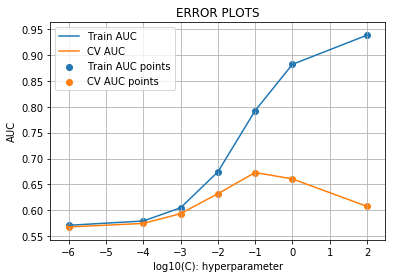

In [228]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=s2c4oHNn0o0G&line=3&uniqifier=1
import matplotlib.pyplot as plt
import math
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a=[]
K = [0.000001,0.0001,0.001,0.01,0.1,1,100]
for i in K:
    neigh = LogisticRegression(random_state=0,C=i,class_weight='balanced')
    neigh.fit(X_tr, y_train)
    a.append(math.log10(i))

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    
plt.plot(a, train_auc, label='Train AUC')
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

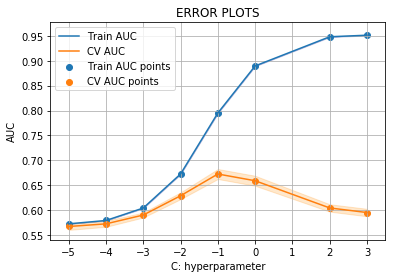

In [229]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import LogisticRegression

neigh = LogisticRegression(class_weight='balanced')
parameters = {'C':  [0.00001,0.0001,0.001,0.01,0.1,1,100,1000]}
clf = GridSearchCV(neigh, parameters, cv=10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

a=[]
for i in parameters['C']:
    a.append(math.log10(i))

    

plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(a, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [244]:
best_C = 0.2

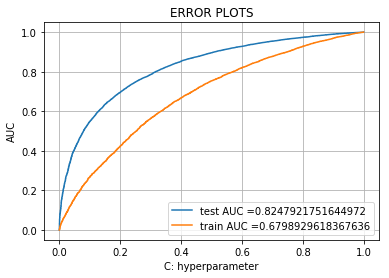

In [245]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=S1OoXn2V0o0T&line=9&uniqifier=1
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(random_state=0,C=best_C,class_weight='balanced')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="test AUC =" + (auc(train_fpr, train_tpr)).__str__())
plt.plot(test_fpr, test_tpr, label="train AUC =" + (auc(test_fpr, test_tpr)).__str__())


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [246]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=NNblWZd50o0W&line=10&uniqifier=1
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [247]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
from sklearn.metrics import confusion_matrix
print("-"*50)
print("Train confusion matrix")
a1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(a1)

--------------------------------------------------
Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.397
[[ 3879  3879]
 [ 4520 38958]]


Text(0.5,15,'Predicted label')

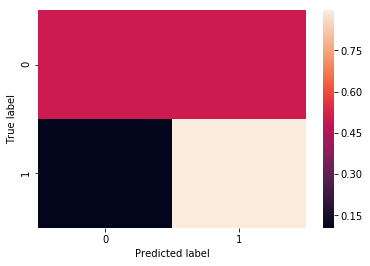

In [248]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a1
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [249]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
print("-"*50)
print("Test confusion matrix")
a2=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(a2)

--------------------------------------------------
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.467
[[ 2455  2508]
 [ 6767 21045]]


Text(0.5,15,'Predicted label')

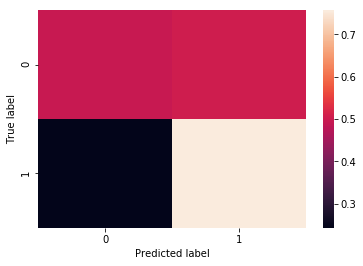

In [250]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a2
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## >SET 3:

In [260]:
# Please write all the code with proper documentation
##https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=UJ_XtSfe0oz5&line=9&uniqifier=1
from scipy.sparse import hstack
X_tr = hstack((X_train_teacher_norm,X_train_price_norm,X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,avg_w2v_vectors_X_train_titles,avg_w2v_vectors_X_train,X_train_grade_school_state,X_train_grade_teacher_prefix,X_train_grade_clean_categories,X_train_summ_count_norm,X_train_digits_summary)).tocsr()
X_cr = hstack((X_cv_teacher_norm,X_cv_price_norm,X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,avg_w2v_vectors_X_cv_titles,avg_w2v_vectors_X_cv,X_cv_grade_school_state,X_cv_grade_teacher_prefix,X_cv_grade_clean_categories,X_cv_summ_count_norm,X_cv_digits_summary)).tocsr()
X_te = hstack((X_test_teacher_norm,X_test_price_norm,X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,avg_w2v_vectors_X_test_titles,avg_w2v_vectors_X_test,X_test_grade_school_state,X_test_grade_teacher_prefix,X_test_grade_clean_categories,X_test_summ_count_norm,X_test_digits_summary)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)    

Final Data matrix
(51236, 968) (51236,)
(25237, 968) (25237,)
(32775, 968) (32775,)


In [261]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=1PvKeJaW0o0E&line=12&uniqifier=1
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

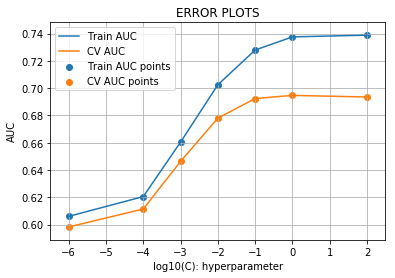

In [262]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=s2c4oHNn0o0G&line=3&uniqifier=1
import matplotlib.pyplot as plt
import math
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a=[]
K = [0.000001,0.0001,0.001,0.01,0.1,1,100]
for i in K:
    neigh = LogisticRegression(random_state=0,C=i,class_weight='balanced')
    neigh.fit(X_tr, y_train)
    a.append(math.log10(i))

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    
plt.plot(a, train_auc, label='Train AUC')
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

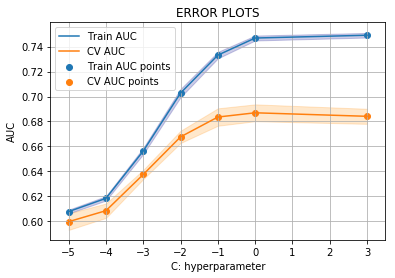

In [263]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import LogisticRegression

neigh = LogisticRegression(class_weight='balanced')
parameters = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,1000]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

a=[]
for i in parameters['C']:
    a.append(math.log10(i))

    

plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(a, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [286]:
best_C =1.1

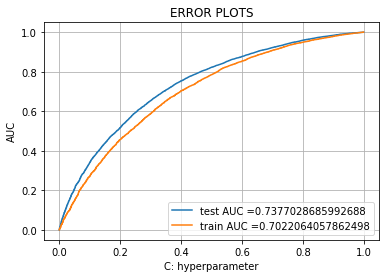

In [287]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=S1OoXn2V0o0T&line=9&uniqifier=1
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(random_state=0,C=best_C,class_weight='balanced')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="test AUC =" + (auc(train_fpr, train_tpr)).__str__())
plt.plot(test_fpr, test_tpr, label="train AUC =" + (auc(test_fpr, test_tpr)).__str__())


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [288]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=NNblWZd50o0W&line=10&uniqifier=1
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [289]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
from sklearn.metrics import confusion_matrix
print("-"*50)
print("Train confusion matrix")
a1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(a1)

--------------------------------------------------
Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.4
[[ 3879  3879]
 [ 7717 35761]]


Text(0.5,15,'Predicted label')

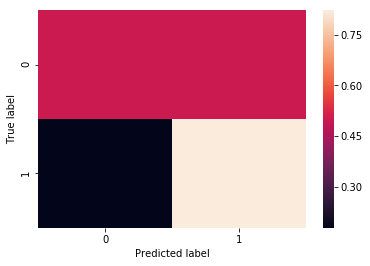

In [290]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a1
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [291]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
print("-"*50)
print("Test confusion matrix")
a2=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(a2)

--------------------------------------------------
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.498
[[ 3179  1784]
 [ 9390 18422]]


Text(0.5,15,'Predicted label')

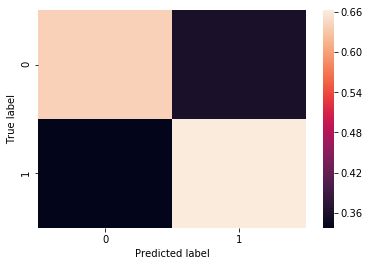

In [292]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a2
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## >SET 4:

In [328]:
# Please write all the code with proper documentation
##https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=UJ_XtSfe0oz5&line=9&uniqifier=1
from scipy.sparse import hstack
X_tr = hstack((X_train_teacher_norm,X_train_price_norm,X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,tfidf_w2v_vectors_X_train_titles,tfidf_w2v_vectors_X_train,X_train_grade_school_state,X_train_grade_teacher_prefix,X_train_grade_clean_categories,X_train_summ_count_norm,X_train_digits_summary)).tocsr()
X_cr = hstack((X_cv_teacher_norm,X_cv_price_norm,X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,tfidf_w2v_vectors_X_cv_titles,tfidf_w2v_vectors_X_cv,X_cv_grade_school_state,X_cv_grade_teacher_prefix,X_cv_grade_clean_categories,X_cv_summ_count_norm,X_cv_digits_summary)).tocsr()
X_te = hstack((X_test_teacher_norm,X_test_price_norm,X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,tfidf_w2v_vectors_X_test_titles,tfidf_w2v_vectors_X_test,X_test_grade_school_state,X_test_grade_teacher_prefix,X_test_grade_clean_categories,X_test_summ_count_norm,X_test_digits_summary)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)    

Final Data matrix
(51236, 968) (51236,)
(25237, 968) (25237,)
(32775, 968) (32775,)


In [329]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=1PvKeJaW0o0E&line=12&uniqifier=1
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

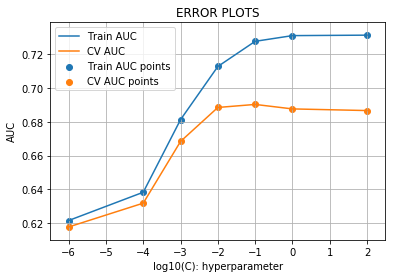

In [330]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=s2c4oHNn0o0G&line=3&uniqifier=1
import matplotlib.pyplot as plt
import math
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a=[]
K = [0.000001,0.0001,0.001,0.01,0.1,1,100]
for i in K:
    neigh = LogisticRegression(random_state=0,C=i,class_weight='balanced')
    neigh.fit(X_tr, y_train)
    a.append(math.log10(i))

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    
plt.plot(a, train_auc, label='Train AUC')
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

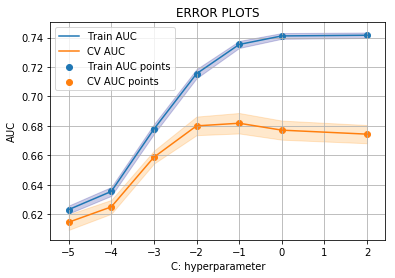

In [331]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import LogisticRegression

neigh = LogisticRegression(class_weight='balanced')
parameters = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,100]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

a=[]
for i in parameters['C']:
    a.append(math.log10(i))

    

plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(a, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [355]:
best_C = 0.17

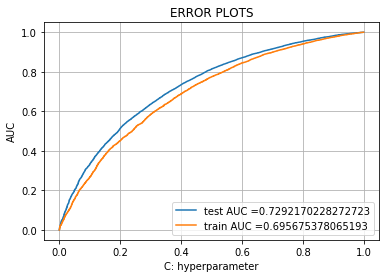

In [356]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=S1OoXn2V0o0T&line=9&uniqifier=1
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(random_state=0,C=best_C,class_weight='balanced')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="test AUC =" + (auc(train_fpr, train_tpr)).__str__())
plt.plot(test_fpr, test_tpr, label="train AUC =" + (auc(test_fpr, test_tpr)).__str__())


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [358]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=NNblWZd50o0W&line=10&uniqifier=1
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [359]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
from sklearn.metrics import confusion_matrix
print("-"*50)
print("Train confusion matrix")
a1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(a1)

--------------------------------------------------
Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.407
[[ 3879  3879]
 [ 8130 35348]]


Text(0.5,15,'Predicted label')

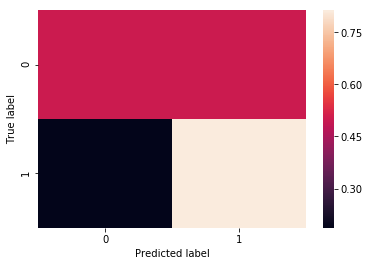

In [360]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a1
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [361]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
print("-"*50)
print("Test confusion matrix")
a2=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(a2)

--------------------------------------------------
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.5
[[ 3238  1725]
 [10148 17664]]


Text(0.5,15,'Predicted label')

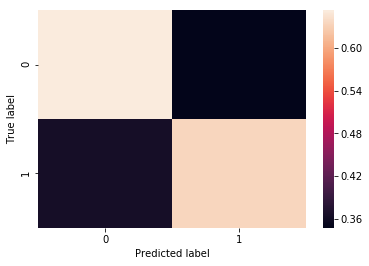

In [362]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a2
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h2>2.5 Logistic Regression with added Features `Set 5` </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [251]:
project_data['negative'][0:10]

0    0.008
1    0.037
2    0.058
3    0.052
4    0.016
5    0.077
6    0.028
7    0.019
8    0.007
9    0.051
Name: negative, dtype: float64

In [252]:
X_train['negative'][0:10]

95657     0.046
21099     0.050
15324     0.022
51842     0.043
55163     0.009
63106     0.007
100773    0.000
53248     0.011
108057    0.009
68907     0.007
Name: negative, dtype: float64

In [253]:
X_train_neutral=np.array(X_train['neutral'])
X_train_positive=np.array(X_train['positive'])
X_train_negative=np.array(X_train['negative'])
X_cv_neutral=np.array(X_cv['neutral'])
X_cv_positive=np.array(X_cv['positive'])
X_cv_negative=np.array(X_cv['negative'])
X_test_neutral=np.array(X_test['neutral'])
X_test_positive=np.array(X_test['positive'])
X_test_negative=np.array(X_test['negative'])

In [254]:
X_train_neutral=X_train_neutral.reshape(-1,1)
X_train_positive=X_train_positive.reshape(-1,1)
X_train_negative=X_train_negative.reshape(-1,1)
X_cv_neutral=X_cv_neutral.reshape(-1,1)
X_cv_positive=X_cv_positive.reshape(-1,1)
X_cv_negative=X_cv_negative.reshape(-1,1)
X_test_neutral=X_test_neutral.reshape(-1,1)
X_test_positive=X_test_positive.reshape(-1,1)
X_test_negative=X_test_negative.reshape(-1,1)

In [255]:
print(X_train_neutral.shape)
print(X_train_positive.shape)
print(X_train_negative.shape)
print(X_cv_neutral.shape)
print(X_cv_positive.shape)
print(X_cv_negative.shape)
print(X_test_neutral.shape)
print(X_test_positive.shape)
print(X_test_negative.shape)

(51236, 1)
(51236, 1)
(51236, 1)
(25237, 1)
(25237, 1)
(25237, 1)
(32775, 1)
(32775, 1)
(32775, 1)


In [256]:
X_train_neutral[0:10]

array([[0.845],
       [0.781],
       [0.829],
       [0.78 ],
       [0.788],
       [0.801],
       [0.846],
       [0.831],
       [0.78 ],
       [0.835]])

In [257]:
type(X_train_neutral)

numpy.ndarray

In [295]:
from scipy.sparse import hstack
X_tr = hstack((X_train_teacher_norm, X_train_price_norm, X_train_categories_one_hot, X_train_sub_categories_one_hot, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_essay_count_norm, X_train_title_count_norm, X_train_quantity_norm, X_train_neutral, X_train_positive, X_train_negative, X_train_grade_school_state, X_train_grade_teacher_prefix, X_train_grade_clean_categories, X_train_summ_count_norm, X_train_digits_summary))
X_cr = hstack((X_cv_teacher_norm, X_cv_price_norm, X_cv_categories_one_hot, X_cv_sub_categories_one_hot, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_essay_count_norm, X_cv_title_count_norm, X_cv_quantity_norm, X_cv_neutral, X_cv_positive, X_cv_negative, X_cv_grade_school_state, X_cv_grade_teacher_prefix, X_cv_grade_clean_categories, X_cv_summ_count_norm, X_cv_digits_summary))
X_te = hstack((X_test_teacher_norm, X_test_price_norm, X_test_categories_one_hot, X_test_sub_categories_one_hot, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_essay_count_norm, X_test_title_count_norm, X_test_quantity_norm, X_test_neutral, X_test_positive, X_test_negative, X_test_grade_school_state, X_test_grade_teacher_prefix, X_test_grade_clean_categories, X_test_summ_count_norm, X_test_digits_summary))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(51236, 374) (51236,)
(25237, 374) (25237,)
(32775, 374) (32775,)


In [296]:
type(X_tr)

scipy.sparse.coo.coo_matrix

In [297]:
X_tr=X_tr.tocsr()
X_cr=X_cr.tocsr()
X_te=X_te.tocsr()

In [298]:
type(X_tr)

scipy.sparse.csr.csr_matrix

In [299]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=1PvKeJaW0o0E&line=12&uniqifier=1
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

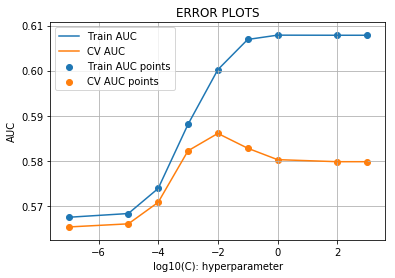

In [300]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=s2c4oHNn0o0G&line=3&uniqifier=1
import matplotlib.pyplot as plt
import math
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a=[]
K = [0.0000001,0.00001,0.0001,0.001,0.01,0.1,1,100,1000]
for i in K:
    neigh = LogisticRegression(random_state=0,C=i,class_weight='balanced')
    neigh.fit(X_tr, y_train)
    a.append(math.log10(i))

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
    
plt.plot(a, train_auc, label='Train AUC')
plt.plot(a, cv_auc, label='CV AUC')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log10(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

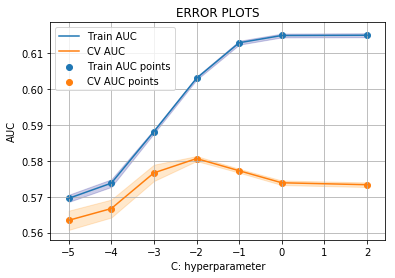

In [301]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import math
from sklearn.linear_model import LogisticRegression

neigh = LogisticRegression(class_weight='balanced')
parameters = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,100]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

a=[]
for i in parameters['C']:
    a.append(math.log10(i))

    

plt.plot(a, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(a, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(a,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(a, train_auc, label='Train AUC points')
plt.scatter(a, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [320]:
best_C = 0.027

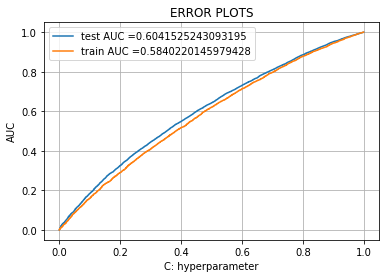

In [321]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=S1OoXn2V0o0T&line=9&uniqifier=1
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc


neigh = LogisticRegression(random_state=0,C=best_C,class_weight='balanced')
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="test AUC =" + (auc(train_fpr, train_tpr)).__str__())
plt.plot(test_fpr, test_tpr, label="train AUC =" + (auc(test_fpr, test_tpr)).__str__())


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [322]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=NNblWZd50o0W&line=10&uniqifier=1
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [323]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
from sklearn.metrics import confusion_matrix
print("-"*50)
print("Train confusion matrix")
a1=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
print(a1)

--------------------------------------------------
Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.483
[[ 3879  3879]
 [15562 27916]]


Text(0.5,15,'Predicted label')

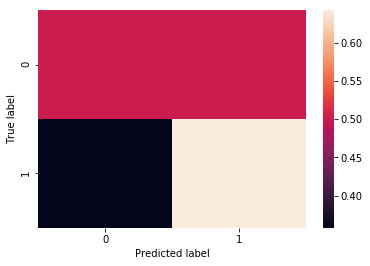

In [324]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a1
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [325]:
#https://colab.research.google.com/drive/1EkYHI-vGKnURqLL_u5LEf3yb0YJBVbZW#scrollTo=aaBfq1FE0o0Z&line=4&uniqifier=1
print("-"*50)
print("Test confusion matrix")
a2=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
print(a2)

--------------------------------------------------
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999998985034083 for threshold 0.524
[[ 3316  1647]
 [15427 12385]]


Text(0.5,15,'Predicted label')

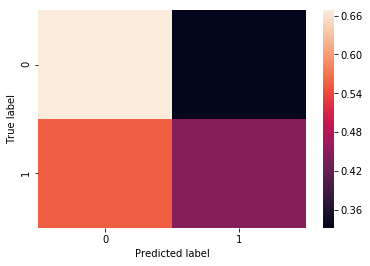

In [326]:
#https://stackoverflow.com/a/54270102
import seaborn as sns
conf_mat = a2
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [363]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyperparameter", "test_AUC"]


x.add_row(["BOW", "Brute+GridSearchCV", 0.01, 0.805])
x.add_row(["TFIDF", "Brute+GridSearchCV", 0.2, 0.824])
x.add_row(["W2V", "Brute+GridSearchCV", 1.1, 0.737])
x.add_row(["TFIDFW2V", "Brute+GridSearchCV",0.17 , 0.729])


print(x)

+------------+--------------------+----------------+----------+
| Vectorizer |       Model        | Hyperparameter | test_AUC |
+------------+--------------------+----------------+----------+
|    BOW     | Brute+GridSearchCV |      0.01      |  0.805   |
|   TFIDF    | Brute+GridSearchCV |      0.2       |  0.824   |
|    W2V     | Brute+GridSearchCV |      1.1       |  0.737   |
|  TFIDFW2V  | Brute+GridSearchCV |      0.17      |  0.729   |
+------------+--------------------+----------------+----------+
